In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap, MDS
from sklearn.preprocessing import MinMaxScaler

from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColorBar, ColumnDataSource, Panel, Tabs
from bokeh.transform import factor_cmap
from bokeh.palettes import brewer, d3, viridis

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
data = pd.read_csv('../data/monthly_returns.csv')
data.fillna(0, inplace=True)

In [4]:
data.head()

,fundRUN,fundName,fundSeries,aafmCategory,svsCategory,svsCategoryId,currency,fundRUNSeries,userCategory,2015-01-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,8812-9,A. CHILE CALIFICADO,D,Inversionistas Calificados Accionario Nacional,FM DIRIGIDO A INVERSIONISTAS CALIFICADOS,8.0,P,8812-9D,"Domestic Bond, < 365",0.0,...,0.132672,-0.057720,0.070311,0.020237,-0.050056,-0.044621,-0.035133,0.144541,0.048542,0.007059
1,8289-9,ACCIONES CHILE,APV,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,8289-9APV,Domestic Equity,0.0,...,0.136457,-0.082939,0.073080,0.019198,-0.053094,-0.034062,-0.035530,0.127005,0.037329,0.021519
2,8076-4,ACCIONES CHILENAS,APV,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,8076-4APV,Domestic Equity,0.0,...,0.129128,-0.094408,0.079963,0.015541,-0.061667,-0.035633,-0.028523,0.132270,0.031448,0.024364
3,9254-1,ACCIONES EUROPA,ALTO,Accionario Europa Desarrollado,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,9254-1ALTO,International Equity,0.0,...,0.067920,0.023503,0.048448,-0.052715,0.071055,-0.031470,-0.091700,0.193174,-0.033948,0.019622
4,8247-3,ACCIONES LATAM,A,Accionario America Latina,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,8247-3A,International Equity,0.0,...,0.035468,0.058950,0.088180,0.032770,-0.035445,-0.065448,-0.019082,0.213664,0.006958,-0.017005


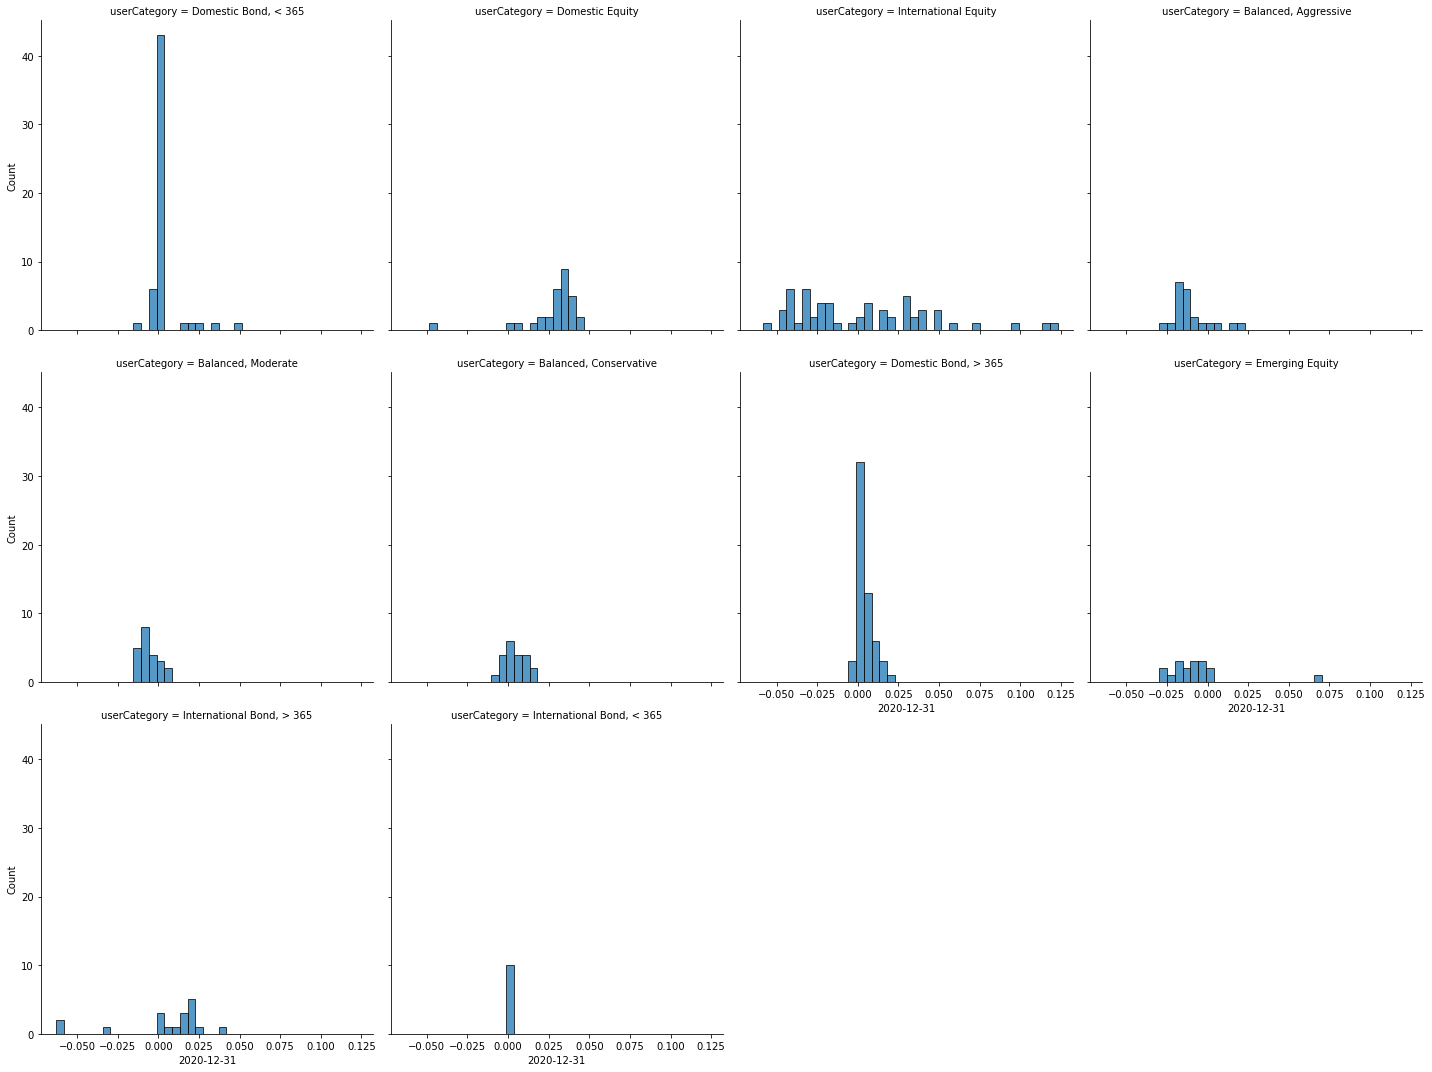

In [5]:
sns.displot(data, x='2020-12-31', col='userCategory', col_wrap=4)
plt.show()

In [6]:
all_data = []
for cat in data['userCategory'].unique():
    mask = data['userCategory'] == cat
    df = data[mask].copy()
    df_profile = df.iloc[:, :9]
    df_num = df.iloc[:, 10:]
    pl = Pipeline(
        steps = [
            ('scaler', StandardScaler()),
            ('mds', MDS()),
        ]
    )
    components = pl.fit_transform(df_num)
    df_profile['x_coord'] = components[:, 0]
    df_profile['y_coord'] = components[:, 1]
    all_data.append(df_profile)
mapped = pd.concat(all_data)

In [7]:
mapped

,fundRUN,fundName,fundSeries,aafmCategory,svsCategory,svsCategoryId,currency,fundRUNSeries,userCategory,x_coord,y_coord
0,8812-9,A. CHILE CALIFICADO,D,Inversionistas Calificados Accionario Nacional,FM DIRIGIDO A INVERSIONISTAS CALIFICADOS,8.0,P,8812-9D,"Domestic Bond, < 365",-25.594347,-5.650055
16,8755-6,AHORRO A PLAZO,A,Fondos de Deuda < 365 Dias Nacional en pesos,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,2.0,P,8755-6A,"Domestic Bond, < 365",2.231442,-1.393484
18,9291-6,AHORRO CORTO PLAZO,VIVIENDA,Fondos de Deuda < 365 Dias Nacional en UF,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,2.0,P,9291-6VIVIENDA,"Domestic Bond, < 365",2.626982,-3.689517
20,9222-3,AHORRO MP,APV,Fondos de Deuda < 365 Dias Nacional en UF,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,2.0,P,9222-3APV,"Domestic Bond, < 365",3.235257,-3.137942
41,8107-8,BCI COMPETITIVO,APV,Fondos de Deuda < 90 Dias Nacional,FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,1.0,P,8107-8APV,"Domestic Bond, < 365",1.493446,-0.719145
...,...,...,...,...,...,...,...,...,...,...,...
133,8384-4,DOLAR MONEY MARKET,A,"Fondos de Deuda < 90 Dias Internacional, Dolar",FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,1.0,D,8384-4A,"International Bond, < 365",-3.397690,-2.686686
182,8945-1,IM TRUST MONEY MARKET,B,"Fondos de Deuda < 90 Dias Internacional, Dolar",FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,1.0,D,8945-1B,"International Bond, < 365",2.923386,1.392519
212,8325-9,LIQUIDEZ DOLAR,A,"Fondos de Deuda < 90 Dias Internacional, Dolar",FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,1.0,D,8325-9A,"International Bond, < 365",-4.934396,6.306061
281,8238-4,SCOTIA DOLAR,UNICA,"Fondos de Deuda < 90 Dias Internacional, Dolar",FM DE INV.EN INST.DE DEUDA DE C/P CON DURACION...,1.0,D,8238-4UNICA,"International Bond, < 365",-1.184475,5.501681


In [8]:
flows = pd.read_csv('../data/FundDataRecentFlows.csv')
flows.head()

,fundRUNSeries,netPatrimony,providedFlow,rescuedFlow
0,8011-K100,9.273251e+09,1.409036e+08,1.345770e+08
1,8011-KB,5.882267e+09,2.540334e+07,2.961197e+07
2,8011-KC,3.057670e+10,2.154863e+08,2.320578e+08
3,8011-KCASH,1.062732e+10,3.385122e+07,4.132463e+07
4,8011-KG,6.270319e+10,1.704499e+08,1.811517e+08


In [9]:
mapped = mapped.merge(flows, on='fundRUNSeries')

In [10]:
def make_plot(data, user_cat):
    data = data.copy()
    aafm = data['aafmCategory'].unique()
    sc = MinMaxScaler((10, 100))
    data['scaled_value'] = sc.fit_transform(data['netPatrimony'].values.reshape(-1, 1))
    
    tooltips = [
        ('Fund', '@fundName'),
        ('Series', '@fundSeries'),
        ('AUM', '@netPatrimony'),
        ('Currency', '@currency'),
    ]
    p = figure(plot_width=800, plot_height=800, tooltips=tooltips, title=f'{user_cat.title()} Mutual Funds', x_axis_label='Component 1',
              y_axis_label='Component 2')
    source = ColumnDataSource(data=data)
    cmap = factor_cmap('aafmCategory', palette=viridis(len(aafm)), factors=aafm)
    p.circle('x_coord', 'y_coord', source=source, size='scaled_value', color=cmap, alpha=0.7, legend_group='aafmCategory')
    p.legend.location = "bottom_left"
    return p

In [11]:
tabs = []
for cat in mapped['userCategory'].unique():
    mask = mapped['userCategory'] == cat
    tabs.append(Panel(child=make_plot(mapped[mask], cat), title=cat.title()))

In [12]:
output_file('mds_plots.html')
show(Tabs(tabs=tabs))